In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('/home/agam/classes/cv/assignment 3/training_real/real_00001.jpg', cv2.IMREAD_GRAYSCALE)

(<matplotlib.image.AxesImage at 0x7fa774228eb0>,
 array([[180, 176, 171, ..., 171, 168, 173],
        [166, 167, 168, ..., 170, 166, 169],
        [151, 156, 164, ..., 162, 159, 163],
        ...,
        [ 86,  90,  96, ...,  23,  24,  25],
        [ 86,  90,  95, ...,  22,  24,  26],
        [ 90,  95, 100, ...,  21,  24,  26]], dtype=uint8))

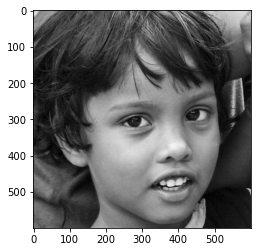

In [6]:
plt.imshow(img, cmap='gray'), img

In [25]:
face_cascade = cv2.CascadeClassifier('/home/agam/classes/cv/assignment 3/haarcascade_frontalface_default.xml')
imgcopy = img

In [26]:
detected_face = face_cascade.detectMultiScale(img)

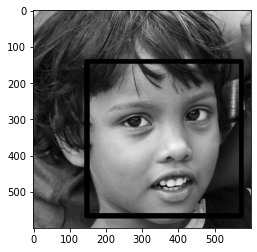

In [28]:
for (column, row, width, height) in detected_face:
    cv2.rectangle(
        imgcopy,
        (column, row),
        (column + width, row + height),
        (0, 150, 0),
        10
    )
plt.imshow(imgcopy, cmap='gray')

In [29]:
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   


In [30]:
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   

In [31]:
output = np.zeros(img.shape)

In [32]:
for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
        output[i][j] = lbp_calculated_pixel(img, i, j)

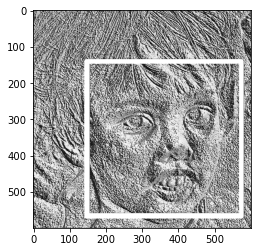

In [33]:
plt.imshow(output, cmap='gray')